In [5]:
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import hashlib
from datetime import datetime

# Uniform distribution random with sha256

In [2]:
def randuniformsha(low=0, high=1, size=1, nbbytes=2, seed=None):
    int(np.ceil(256/(8*nbbytes)))
    
    if seed is None:
        seed=str(datetime.now())
    seedsha= str(seed)
    
    nbsha = int(np.ceil(size/(256/(8*nbbytes))))
    
    bytessha = [hashlib.sha512((str(i)+seedsha).encode()).digest() for i in range(nbsha)]
    bytessha = b''.join(bytessha)
    bytessha= [bytessha[i:i+nbbytes] for i in range(0,size*nbbytes,nbbytes)]
    
    arr=np.array([int.from_bytes(x, byteorder='big') for x in bytessha])
    arr=arr
    arr=arr/(2**(nbbytes*8))
    arr=arr*(high-low)+low
    return arr

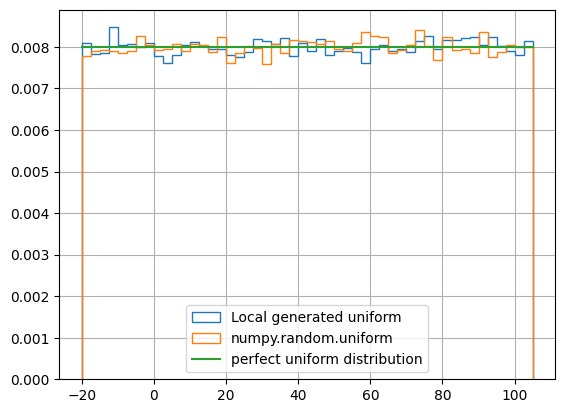

In [3]:
a,b= -20,105
arr=randuniformsha(low=a, high=b, size=100000, nbbytes=4)
plt.hist(arr, bins=50, histtype=u'step', label = "Local generated uniform", density=True)

arr=np.random.uniform(low=a, high=b, size=100000 )
plt.hist(arr, bins=50, histtype=u'step', label = "numpy.random.uniform", density=True)

x=np.arange(a,b, 1)
plt.plot([a,b],[1/(b-a), 1/(b-a)], label = "perfect uniform distribution")

plt.legend()
plt.grid()
plt.show()

# Choice 

In [4]:
def randchoicesha(a, size=None, replace=True, p=None, seed=None):

    if seed is None:
        seed=str(datetime.now())
    seedsha= str(seed)

    if not replace: 
        print("in this function, the replace must be true")
    
    csp=np.cumsum(p)
    csp=np.insert(csp, 0, 0)
    if csp[-1]!=1:
        print("the p sum must be 1")
        return None
    
    arr=randuniformsha(low=0, high=1, size=size, nbbytes=4, seed=seed)
    
    res= [np.nan]*size
    for i in range(len(csp)-1):
        mask= (arr >csp[i]) & (arr <=csp[i+1])
        for k, m in enumerate (mask): 
            if m:
                res[k]=a[i]
    return res

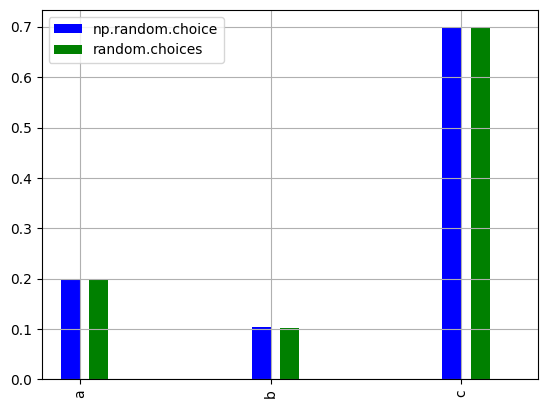

In [5]:
res= np.random.choice(a=['a','b','c'], size=10000, p=[0.2,0.1,0.7])
s= pd.Series(res).value_counts()
s=s/s.sum()
s1=s.sort_index()




res= randchoicesha(a=['a','b','c'], size=10000, p=[0.2,0.1,0.7])
s= pd.Series(res).value_counts()
s=s/s.sum()
s2=s.sort_index()



s1.plot.bar(width=0.1, position=1, label="np.random.choice", color='blue', align='center')
s2.plot.bar(width=0.1, position=0, label="random.choices", color='green', align='edge')
plt.grid()
plt.legend()
plt.show()

In [6]:
print(s1)
print(s2)

a    0.1976
b    0.1039
c    0.6985
Name: count, dtype: float64
a    0.2002
b    0.1011
c    0.6987
Name: count, dtype: float64


# Normal distribution random with sha256

### reminder: Normal distribution (reminder)
https://fr.wikipedia.org/wiki/Loi_normale

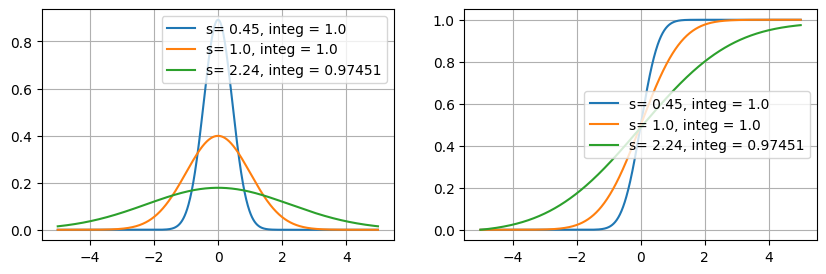

In [7]:
from scipy.integrate import cumulative_trapezoid
def nor(x, m=0, s=1): 
    return (1/(s*np.sqrt(2*np.pi)))*np.exp(-(1/(2*s**2))*(x-m)**2)
x= np.arange(-5,5,0.01)
fig, axs = plt.subplots(1,2, figsize=(10, 3))
for s in [np.sqrt(0.2),1.,np.sqrt(5)]:

    y=nor(x, m=0,s=s)
    integ= np.trapezoid(y=y, x=x)
    axs[0].plot(x, y, 
    label = "s= "+str(np.float64(s).round(2))+", integ = "+str(integ.round(5)))

    cdf = cumulative_trapezoid(y, x, initial=0)
    axs[1].plot(x, cdf, label = "s= "+str(np.float64(s).round(2))+", integ = "+str(integ.round(5)))
    

axs[0].grid()
axs[0].legend()
axs[1].grid()
axs[1].legend()
plt.show()

mean and variance of uniform distribution

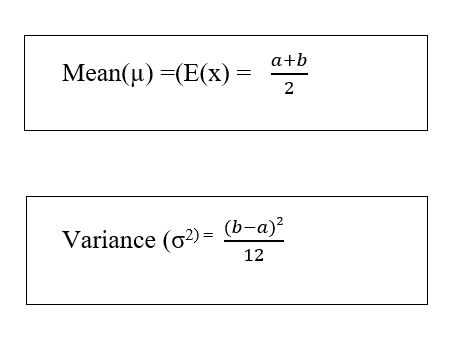

### Use sha2 to generate noraml dist

In [8]:
def randnormalsha(loc=0.0, scale=1.0, size=1, seed=None):
    if seed is None:
        seed=str(datetime.now())
    seedsha= str(seed)
    
    arr=[float (randuniformsha(low=0, high=256, size=64, nbbytes=1, seed=seedsha+str(i)).sum()) for i in range(size)]
    arr=np.array(arr)

    mn=(255/2)*64
    sn=np.sqrt((255**2/12)*64)
    
    arr=arr-mn
    arr/=sn
    arr*=scale
    arr+=loc

    return arr

In [9]:
randnormalsha(), randnormalsha()

(array([0.49923817]), array([1.41960243]))

In [10]:
randnormalsha(seed=0), randnormalsha(seed=0)

(array([0.93904323]), array([0.93904323]))

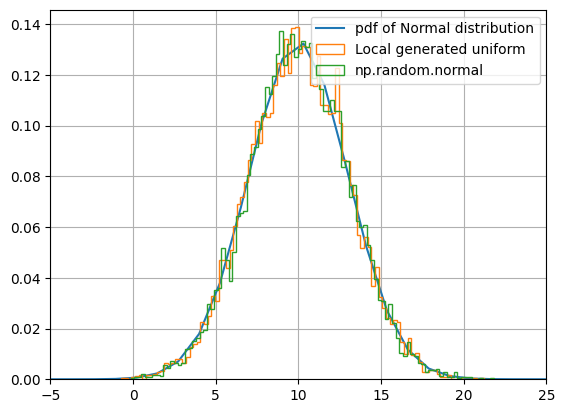

In [11]:
N=10000

x= np.linspace(arr.min(), arr.max(), 100)
y=scipy.stats.norm.pdf(x, 10,3)
plt.plot(x,y, label="pdf of Normal distribution")

arr= randnormalsha(loc=10, scale=3, size=N)
plt.hist(arr, bins=100, histtype=u'step', label = "Local generated uniform", density=True)

arr= np.random.normal(loc=10, scale=3, size=N)
plt.hist(arr, bins=100, histtype=u'step', label = "np.random.normal", density=True)

plt.legend()
plt.grid()
plt.xlim([-5,25])
plt.show()

# Central limit theorem

## Same mu and std

https://en.wikipedia.org/wiki/Central_limit_theorem
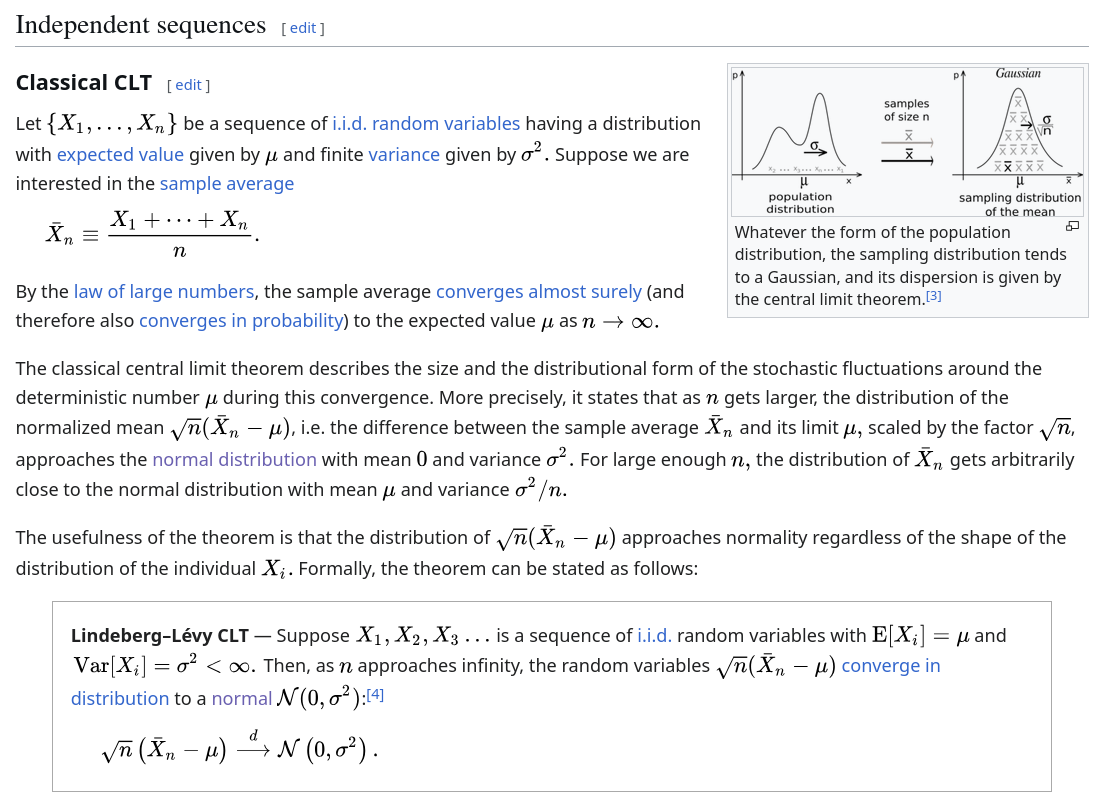

### Example 1: uniform dist

https://en.wikipedia.org/wiki/Continuous_uniform_distribution
$$ {\displaystyle f(x)={\begin{cases}{\frac {1}{b-a}}&{\text{for }}a\leq x\leq b,\\[8pt]0&{\text{for }}x<a\ {\text{ or }}\ x>b.\end{cases}}}$$

int dist(x)dx 0.989605


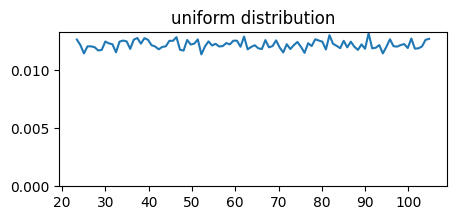

In [19]:
a,b= 23,105.2

arr=np.random.uniform(low=a, high=b, size=100000 )
hist, bins = np.histogram(arr, bins =100, density=True)
bins=(bins[1: ]+bins[:-1])/2
print("int dist(x)dx", np.trapezoid(hist, bins))

plt.figure(figsize=(5, 2))
plt.plot(bins, hist)
plt.ylim([0,None])
plt.title('uniform distribution')
plt.show()

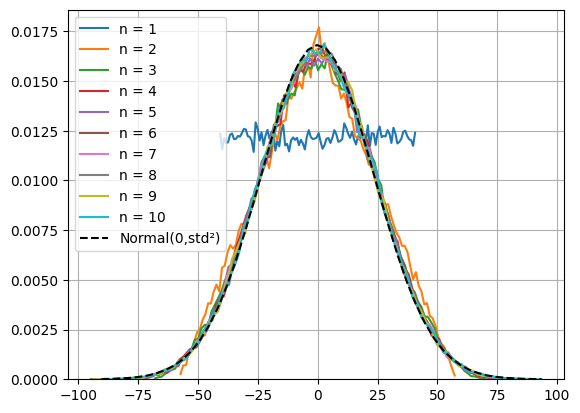

In [34]:
mu = (a+b)/2
std = (b-a)/np.sqrt(12)

N=100000
arr=np.zeros(N)
Nb=11
for n in range(1,Nb):
    arr+=np.random.uniform(low=a, high=b, size=N )
    hist, bins = np.histogram(np.sqrt(n)*(arr/n-mu), bins =100, density=True)
    bins=(bins[1: ]+bins[:-1])/2
    plt.plot(bins, hist,label="n = "+str(n))





x= np.linspace(bins.min(), bins.max(), 50)
y=scipy.stats.norm.pdf(x, loc=0,scale=std)
plt.plot(x, y,label="Normal(0,std²)",c="k",linestyle="--")
  
plt.ylim([0,None])
plt.legend()
plt.grid()
plt.show()

### Example 2:  Exponential

https://en.wikipedia.org/wiki/Exponential_distribution

$$ f(x, \frac{1}{\beta}) = \frac{1}{\beta} \exp(-\frac{x}{\beta})$$
$$ \beta = 1/\lambda$$

int dist(x)dx 0.9305200000000001


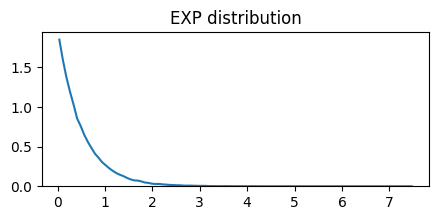

In [27]:
lambda_=2
arr=np.random.exponential(scale=1/lambda_, size=N)
hist, bins = np.histogram(arr, bins =100, density=True)
bins=(bins[1: ]+bins[:-1])/2
print("int dist(x)dx", np.trapezoid(hist, bins))

plt.figure(figsize=(5, 2))
plt.plot(bins, hist)
plt.ylim([0,None])
plt.title('EXP distribution')
plt.show()

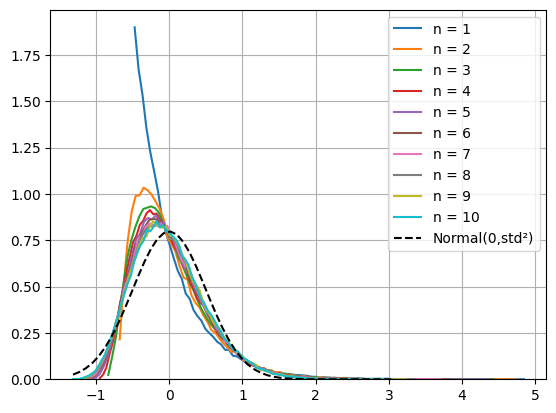

In [33]:
lambda_=2
mu = 1/lambda_
std= 1/lambda_

N=100000
arr=np.zeros(N)
Nb=11
for n in range(1,Nb):
    arr+=np.random.exponential(scale=1/lambda_, size=N)
    hist, bins = np.histogram(np.sqrt(n)*(arr/n-mu), bins =100, density=True)
    bins=(bins[1: ]+bins[:-1])/2
    plt.plot(bins, hist,label="n = "+str(n))




x= np.linspace(bins.min(), bins.max(), 50)
y=scipy.stats.norm.pdf(x, loc=0,scale=std)
plt.plot(x, y,label="Normal(0,std²)",c="k",linestyle="--")
  
plt.ylim([0,None])
plt.legend()
plt.grid()
plt.show()

### Exercice

Throw 20 dice, what is the probability that the sum is ≥ 100?
<br>

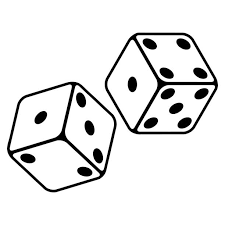

distr of one dice is discrete uniform distribution
<br>mu =(1+2+3+4+5+6)/6= 3.5
<br>std = ? 

In [9]:
a=np.arange(1,6+1)
mu= float(a.mean())
std=float(a.std())
# or 
sdt2=float(np.sqrt(((a-mu)**2).mean()))
var = std**2
mu,std,sdt2, var

(3.5, 1.707825127659933, 1.707825127659933, 2.9166666666666665)

Central limit theorem => 
<br> our experience is ~ Normal(mu*20,var*20)
<br> p(sum >=100) = p ( Normal(mu*20,var*20) >=100)

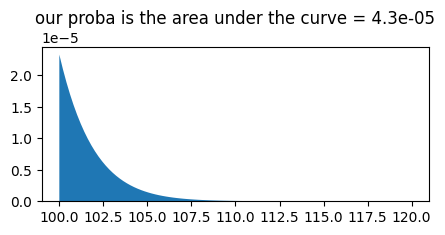

In [10]:
plt.figure(figsize=(5, 2))
x= np.linspace(100, 120, 100)
y=scipy.stats.norm.pdf(x, loc=mu*20,scale=np.sqrt(var*20))
plt.stackplot(x,y)

proba= round(float(np.trapezoid(y,x)),6)

plt.title("our proba is the area under the curve = "+str(proba))
plt.show()

In [26]:
%%time 
# by calcul numpy
Nether=1000000
seeds=[]
probas=[]
for i in range(10):
    seeds.append(i)
    np.random.seed(i)
    a=np.random.randint(1,7,(Nether,20))
    probas.append( float((a.sum(axis=1)>=100).sum()/Nether))

CPU times: user 1.62 s, sys: 199 ms, total: 1.82 s
Wall time: 1.83 s


In [28]:
df=pd.DataFrame({"seed":seeds,"proba":probas})
df

seed     proba
0     0  0.000026
1     1  0.000036
2     2  0.000028
3     3  0.000037
4     4  0.000042
5     5  0.000037
6     6  0.000034
7     7  0.000024
8     8  0.000030
9     9  0.000025

In [30]:
df.proba.mean()

np.float64(3.19e-05)

In [33]:
# Or using CDF directly 
# Calculate the CDF at x = 100
cdf_at_100 = scipy.stats.norm.cdf(100, loc=mu*20,scale=np.sqrt(var*20))

# The probability P(Sum >= 100)
proba = 1 - cdf_at_100
proba

np.float64(4.2841490054512654e-05)

In [38]:
# Or by standardization
x= 100
mean20 = mu*20
sdt20 = np.sqrt(var*20) 
xn=(x-mean20)/sdt20
proba = 1-scipy.stats.norm.cdf(xn, loc=0,scale=1)
print(xn, proba)

3.927922024247863 4.2841490054512654e-05


**Using normal dist table**

https://en.wikipedia.org/wiki/Standard_normal_table
<br>
This table gives a probability that a statistic is less than Z (i.e. between negative infinity and Z). 
<br> we can use the symetry of the dist to calculate positive area

p(N(0,1)>=xn) = p(N(0,1)<=-xn)  : symetric 
<br>xn = 3.9279 ~ 3.92
<br>table ==> p= 0.00004 (see the yellow cell)

<table class="wikitable">

<tbody><tr>
<th><i>z</i></th>
<th>−0.00</th>
<th>−0.01</th>
<th>−0.02</th>
<th>−0.03</th>
<th>−0.04</th>
<th>−0.05</th>
<th>−0.06</th>
<th>−0.07</th>
<th>−0.08</th>
<th>−0.09
</th></tr>
<tr>
<th>−4.0
</th>
<td>0.00003</td>
<td>0.00003</td>
<td>0.00003</td>
<td>0.00003</td>
<td>0.00003</td>
<td>0.00003</td>
<td>0.00002</td>
<td>0.00002</td>
<td>0.00002</td>
<td>0.00002
</td></tr>
<tr>
<td colspan="11" style="padding: 0;">
</td></tr>
<tr>
<th>−3.9
</th>
<td>0.00005</td>
<td>0.00005</td>
<td style="background-color: yellow;">0.00004</td>
<td>0.00004</td>
<td>0.00004</td>
<td>0.00004</td>
<td>0.00004</td>
<td>0.00004</td>
<td>0.00003</td>
<td>0.00003
</td></tr>
<tr>
<th>−3.8
</th>
<td>0.00007</td>
<td>0.00007</td>
<td>0.00007</td>
<td>0.00006</td>
<td>0.00006</td>
<td>0.00006</td>
<td>0.00006</td>
<td>0.00005</td>
<td>0.00005</td>
<td>0.00005
</td></tr>
<tr>
<th>−3.7
</th>
<td>0.00011</td>
<td>0.00010</td>
<td>0.00010</td>
<td>0.00010</td>
<td>0.00009</td>
<td>0.00009</td>
<td>0.00008</td>
<td>0.00008</td>
<td>0.00008</td>
<td>0.00008
</td></tr>
<tr>
<th>−3.6
</th>
<td>0.00016</td>
<td>0.00015</td>
<td>0.00015</td>
<td>0.00014</td>
<td>0.00014</td>
<td>0.00013</td>
<td>0.00013</td>
<td>0.00012</td>
<td>0.00012</td>
<td>0.00011
</td></tr>
<tr>
<th>−3.5
</th>
<td>0.00023</td>
<td>0.00022</td>
<td>0.00022</td>
<td>0.00021</td>
<td>0.00020</td>
<td>0.00019</td>
<td>0.00019</td>
<td>0.00018</td>
<td>0.00017</td>
<td>0.00017
</td></tr>
<tr>
<td colspan="11" style="padding: 0;">
</td></tr>
<tr>
<th>−3.4
</th>
<td>0.00034</td>
<td>0.00032</td>
<td>0.00031</td>
<td>0.00030</td>
<td>0.00029</td>
<td>0.00028</td>
<td>0.00027</td>
<td>0.00026</td>
<td>0.00025</td>
<td>0.00024
</td></tr>
<tr>
<th>−3.3
</th>
<td>0.00048</td>
<td>0.00047</td>
<td>0.00045</td>
<td>0.00043</td>
<td>0.00042</td>
<td>0.00040</td>
<td>0.00039</td>
<td>0.00038</td>
<td>0.00036</td>
<td>0.00035
</td></tr>
<tr>
<th>−3.2
</th>
<td>0.00069</td>
<td>0.00066</td>
<td>0.00064</td>
<td>0.00062</td>
<td>0.00060</td>
<td>0.00058</td>
<td>0.00056</td>
<td>0.00054</td>
<td>0.00052</td>
<td>0.00050
</td></tr>
<tr>
<th>−3.1
</th>
<td>0.00097</td>
<td>0.00094</td>
<td>0.00090</td>
<td>0.00087</td>
<td>0.00084</td>
<td>0.00082</td>
<td>0.00079</td>
<td>0.00076</td>
<td>0.00074</td>
<td>0.00071
</td></tr>
<tr>
<th>−3.0
</th>
<td>0.00135</td>
<td>0.00131</td>
<td>0.00126</td>
<td>0.00122</td>
<td>0.00118</td>
<td>0.00114</td>
<td>0.00111</td>
<td>0.00107</td>
<td>0.00104</td>
<td>0.00100
</td></tr>
<tr>
<td colspan="11" style="padding: 0;">
</td></tr>
<tr>
<th>−2.9
</th>
<td>0.00187</td>
<td>0.00181</td>
<td>0.00175</td>
<td>0.00169</td>
<td>0.00164</td>
<td>0.00159</td>
<td>0.00154</td>
<td>0.00149</td>
<td>0.00144</td>
<td>0.00139
</td></tr>
<tr>
<th>−2.8
</th>
<td>0.00256</td>
<td>0.00248</td>
<td>0.00240</td>
<td>0.00233</td>
<td>0.00226</td>
<td>0.00219</td>
<td>0.00212</td>
<td>0.00205</td>
<td>0.00199</td>
<td>0.00193
</td></tr>
<tr>
<th>−2.7
</th>
<td>0.00347</td>
<td>0.00336</td>
<td>0.00326</td>
<td>0.00317</td>
<td>0.00307</td>
<td>0.00298</td>
<td>0.00289</td>
<td>0.00280</td>
<td>0.00272</td>
<td>0.00264
</td></tr>
<tr>
<th>−2.6
</th>
<td>0.00466</td>
<td>0.00453</td>
<td>0.00440</td>
<td>0.00427</td>
<td>0.00415</td>
<td>0.00402</td>
<td>0.00391</td>
<td>0.00379</td>
<td>0.00368</td>
<td>0.00357
</td></tr>
<tr>
<th>−2.5
</th>
<td>0.00621</td>
<td>0.00604</td>
<td>0.00587</td>
<td>0.00570</td>
<td>0.00554</td>
<td>0.00539</td>
<td>0.00523</td>
<td>0.00508</td>
<td>0.00494</td>
<td>0.00480
</td></tr>
<tr>
<td colspan="11" style="padding: 0;">
</td></tr>
<tr>
<th>−2.4
</th>
<td>0.00820</td>
<td>0.00798</td>
<td>0.00776</td>
<td>0.00755</td>
<td>0.00734</td>
<td>0.00714</td>
<td>0.00695</td>
<td>0.00676</td>
<td>0.00657</td>
<td>0.00639
</td></tr>
<tr>
<th>−2.3
</th>
<td>0.01072</td>
<td>0.01044</td>
<td>0.01017</td>
<td>0.00990</td>
<td>0.00964</td>
<td>0.00939</td>
<td>0.00914</td>
<td>0.00889</td>
<td>0.00866</td>
<td>0.00842
</td></tr>
<tr>
<th>−2.2
</th>
<td>0.01390</td>
<td>0.01355</td>
<td>0.01321</td>
<td>0.01287</td>
<td>0.01255</td>
<td>0.01222</td>
<td>0.01191</td>
<td>0.01160</td>
<td>0.01130</td>
<td>0.01101
</td></tr>
<tr>
<th>−2.1
</th>
<td>0.01786</td>
<td>0.01743</td>
<td>0.01700</td>
<td>0.01659</td>
<td>0.01618</td>
<td>0.01578</td>
<td>0.01539</td>
<td>0.01500</td>
<td>0.01463</td>
<td>0.01426
</td></tr>
<tr>
<th>−2.0
</th>
<td>0.02275</td>
<td>0.02222</td>
<td>0.02169</td>
<td>0.02118</td>
<td>0.02068</td>
<td>0.02018</td>
<td>0.01970</td>
<td>0.01923</td>
<td>0.01876</td>
<td>0.01831
</td></tr>
<tr>
<td colspan="11" style="padding: 0;">
</td></tr>
<tr>
<th>−1.9
</th>
<td>0.02872</td>
<td>0.02807</td>
<td>0.02743</td>
<td>0.02680</td>
<td>0.02619</td>
<td>0.02559</td>
<td>0.02500</td>
<td>0.02442</td>
<td>0.02385</td>
<td>0.02330
</td></tr>
<tr>
<th>−1.8
</th>
<td>0.03593</td>
<td>0.03515</td>
<td>0.03438</td>
<td>0.03362</td>
<td>0.03288</td>
<td>0.03216</td>
<td>0.03144</td>
<td>0.03074</td>
<td>0.03005</td>
<td>0.02938
</td></tr>
<tr>
<th>−1.7
</th>
<td>0.04457</td>
<td>0.04363</td>
<td>0.04272</td>
<td>0.04182</td>
<td>0.04093</td>
<td>0.04006</td>
<td>0.03920</td>
<td>0.03836</td>
<td>0.03754</td>
<td>0.03673
</td></tr>
<tr>
<th>−1.6
</th>
<td>0.05480</td>
<td>0.05370</td>
<td>0.05262</td>
<td>0.05155</td>
<td>0.05050</td>
<td>0.04947</td>
<td>0.04846</td>
<td>0.04746</td>
<td>0.04648</td>
<td>0.04551
</td></tr>
<tr>
<th>−1.5
</th>
<td>0.06681</td>
<td>0.06552</td>
<td>0.06426</td>
<td>0.06301</td>
<td>0.06178</td>
<td>0.06057</td>
<td>0.05938</td>
<td>0.05821</td>
<td>0.05705</td>
<td>0.05592
</td></tr>
<tr>
<td colspan="11" style="padding: 0;">
</td></tr>
<tr>
<th>−1.4
</th>
<td>0.08076</td>
<td>0.07927</td>
<td>0.07780</td>
<td>0.07636</td>
<td>0.07493</td>
<td>0.07353</td>
<td>0.07215</td>
<td>0.07078</td>
<td>0.06944</td>
<td>0.06811
</td></tr>
<tr>
<th>−1.3
</th>
<td>0.09680</td>
<td>0.09510</td>
<td>0.09342</td>
<td>0.09176</td>
<td>0.09012</td>
<td>0.08851</td>
<td>0.08692</td>
<td>0.08534</td>
<td>0.08379</td>
<td>0.08226
</td></tr>
<tr>
<th>−1.2
</th>
<td>0.11507</td>
<td>0.11314</td>
<td>0.11123</td>
<td>0.10935</td>
<td>0.10749</td>
<td>0.10565</td>
<td>0.10383</td>
<td>0.10204</td>
<td>0.10027</td>
<td>0.09853
</td></tr>
<tr>
<th>−1.1
</th>
<td>0.13567</td>
<td>0.13350</td>
<td>0.13136</td>
<td>0.12924</td>
<td>0.12714</td>
<td>0.12507</td>
<td>0.12302</td>
<td>0.12100</td>
<td>0.11900</td>
<td>0.11702
</td></tr>
<tr>
<th>−1.0
</th>
<td>0.15866</td>
<td>0.15625</td>
<td>0.15386</td>
<td>0.15151</td>
<td>0.14917</td>
<td>0.14686</td>
<td>0.14457</td>
<td>0.14231</td>
<td>0.14007</td>
<td>0.13786
</td></tr>
<tr>
<td colspan="11" style="padding: 0;">
</td></tr>
<tr>
<th>−0.9
</th>
<td>0.18406</td>
<td>0.18141</td>
<td>0.17879</td>
<td>0.17619</td>
<td>0.17361</td>
<td>0.17106</td>
<td>0.16853</td>
<td>0.16602</td>
<td>0.16354</td>
<td>0.16109
</td></tr>
<tr>
<th>−0.8
</th>
<td>0.21186</td>
<td>0.20897</td>
<td>0.20611</td>
<td>0.20327</td>
<td>0.20045</td>
<td>0.19766</td>
<td>0.19489</td>
<td>0.19215</td>
<td>0.18943</td>
<td>0.18673
</td></tr>
<tr>
<th>−0.7
</th>
<td>0.24196</td>
<td>0.23885</td>
<td>0.23576</td>
<td>0.23270</td>
<td>0.22965</td>
<td>0.22663</td>
<td>0.22363</td>
<td>0.22065</td>
<td>0.21770</td>
<td>0.21476
</td></tr>
<tr>
<th>−0.6
</th>
<td>0.27425</td>
<td>0.27093</td>
<td>0.26763</td>
<td>0.26435</td>
<td>0.26109</td>
<td>0.25785</td>
<td>0.25463</td>
<td>0.25143</td>
<td>0.24825</td>
<td>0.24510
</td></tr>
<tr>
<th>−0.5
</th>
<td>0.30854</td>
<td>0.30503</td>
<td>0.30153</td>
<td>0.29806</td>
<td>0.29460</td>
<td>0.29116</td>
<td>0.28774</td>
<td>0.28434</td>
<td>0.28096</td>
<td>0.27760
</td></tr>
<tr>
<td colspan="11" style="padding: 0;">
</td></tr>
<tr>
<th>−0.4
</th>
<td>0.34458</td>
<td>0.34090</td>
<td>0.33724</td>
<td>0.33360</td>
<td>0.32997</td>
<td>0.32636</td>
<td>0.32276</td>
<td>0.31918</td>
<td>0.31561</td>
<td>0.31207
</td></tr>
<tr>
<th>−0.3
</th>
<td>0.38209</td>
<td>0.37828</td>
<td>0.37448</td>
<td>0.37070</td>
<td>0.36693</td>
<td>0.36317</td>
<td>0.35942</td>
<td>0.35569</td>
<td>0.35197</td>
<td>0.34827
</td></tr>
<tr>
<th>−0.2
</th>
<td>0.42074</td>
<td>0.41683</td>
<td>0.41294</td>
<td>0.40905</td>
<td>0.40517</td>
<td>0.40129</td>
<td>0.39743</td>
<td>0.39358</td>
<td>0.38974</td>
<td>0.38591
</td></tr>
<tr>
<th>−0.1
</th>
<td>0.46017</td>
<td>0.45620</td>
<td>0.45224</td>
<td>0.44828</td>
<td>0.44433</td>
<td>0.44038</td>
<td>0.43644</td>
<td>0.43251</td>
<td>0.42858</td>
<td>0.42465
</td></tr>
<tr>
<th>−0.0
</th>
<td>0.50000</td>
<td>0.49601</td>
<td>0.49202</td>
<td>0.48803</td>
<td>0.48405</td>
<td>0.48006</td>
<td>0.47608</td>
<td>0.47210</td>
<td>0.46812</td>
<td>0.46414
</td></tr>
<tr>
<th><i>z</i></th>
<th>−0.00</th>
<th>−0.01</th>
<th>−0.02</th>
<th>−0.03</th>
<th>−0.04</th>
<th>−0.05</th>
<th>−0.06</th>
<th>−0.07</th>
<th>−0.08</th>
<th>−0.09
</th></tr></tbody></table>

In [89]:
data=np.array([3.0000e-05, 3.0000e-05, 3.0000e-05, 3.0000e-05, 3.0000e-05,
       3.0000e-05, 2.0000e-05, 2.0000e-05, 2.0000e-05, 2.0000e-05,
       5.0000e-05, 5.0000e-05, 4.0000e-05, 4.0000e-05, 4.0000e-05,
       4.0000e-05, 4.0000e-05, 4.0000e-05, 3.0000e-05, 3.0000e-05,
       7.0000e-05, 7.0000e-05, 7.0000e-05, 6.0000e-05, 6.0000e-05,
       6.0000e-05, 6.0000e-05, 5.0000e-05, 5.0000e-05, 5.0000e-05,
       1.1000e-04, 1.0000e-04, 1.0000e-04, 1.0000e-04, 9.0000e-05,
       9.0000e-05, 8.0000e-05, 8.0000e-05, 8.0000e-05, 8.0000e-05,
       1.6000e-04, 1.5000e-04, 1.5000e-04, 1.4000e-04, 1.4000e-04,
       1.3000e-04, 1.3000e-04, 1.2000e-04, 1.2000e-04, 1.1000e-04,
       2.3000e-04, 2.2000e-04, 2.2000e-04, 2.1000e-04, 2.0000e-04,
       1.9000e-04, 1.9000e-04, 1.8000e-04, 1.7000e-04, 1.7000e-04,
       3.4000e-04, 3.2000e-04, 3.1000e-04, 3.0000e-04, 2.9000e-04,
       2.8000e-04, 2.7000e-04, 2.6000e-04, 2.5000e-04, 2.4000e-04,
       4.8000e-04, 4.7000e-04, 4.5000e-04, 4.3000e-04, 4.2000e-04,
       4.0000e-04, 3.9000e-04, 3.8000e-04, 3.6000e-04, 3.5000e-04,
       6.9000e-04, 6.6000e-04, 6.4000e-04, 6.2000e-04, 6.0000e-04,
       5.8000e-04, 5.6000e-04, 5.4000e-04, 5.2000e-04, 5.0000e-04,
       9.7000e-04, 9.4000e-04, 9.0000e-04, 8.7000e-04, 8.4000e-04,
       8.2000e-04, 7.9000e-04, 7.6000e-04, 7.4000e-04, 7.1000e-04,
       1.3500e-03, 1.3100e-03, 1.2600e-03, 1.2200e-03, 1.1800e-03,
       1.1400e-03, 1.1100e-03, 1.0700e-03, 1.0400e-03, 1.0000e-03,
       1.8700e-03, 1.8100e-03, 1.7500e-03, 1.6900e-03, 1.6400e-03,
       1.5900e-03, 1.5400e-03, 1.4900e-03, 1.4400e-03, 1.3900e-03,
       2.5600e-03, 2.4800e-03, 2.4000e-03, 2.3300e-03, 2.2600e-03,
       2.1900e-03, 2.1200e-03, 2.0500e-03, 1.9900e-03, 1.9300e-03,
       3.4700e-03, 3.3600e-03, 3.2600e-03, 3.1700e-03, 3.0700e-03,
       2.9800e-03, 2.8900e-03, 2.8000e-03, 2.7200e-03, 2.6400e-03,
       4.6600e-03, 4.5300e-03, 4.4000e-03, 4.2700e-03, 4.1500e-03,
       4.0200e-03, 3.9100e-03, 3.7900e-03, 3.6800e-03, 3.5700e-03,
       6.2100e-03, 6.0400e-03, 5.8700e-03, 5.7000e-03, 5.5400e-03,
       5.3900e-03, 5.2300e-03, 5.0800e-03, 4.9400e-03, 4.8000e-03,
       8.2000e-03, 7.9800e-03, 7.7600e-03, 7.5500e-03, 7.3400e-03,
       7.1400e-03, 6.9500e-03, 6.7600e-03, 6.5700e-03, 6.3900e-03,
       1.0720e-02, 1.0440e-02, 1.0170e-02, 9.9000e-03, 9.6400e-03,
       9.3900e-03, 9.1400e-03, 8.8900e-03, 8.6600e-03, 8.4200e-03,
       1.3900e-02, 1.3550e-02, 1.3210e-02, 1.2870e-02, 1.2550e-02,
       1.2220e-02, 1.1910e-02, 1.1600e-02, 1.1300e-02, 1.1010e-02,
       1.7860e-02, 1.7430e-02, 1.7000e-02, 1.6590e-02, 1.6180e-02,
       1.5780e-02, 1.5390e-02, 1.5000e-02, 1.4630e-02, 1.4260e-02,
       2.2750e-02, 2.2220e-02, 2.1690e-02, 2.1180e-02, 2.0680e-02,
       2.0180e-02, 1.9700e-02, 1.9230e-02, 1.8760e-02, 1.8310e-02,
       2.8720e-02, 2.8070e-02, 2.7430e-02, 2.6800e-02, 2.6190e-02,
       2.5590e-02, 2.5000e-02, 2.4420e-02, 2.3850e-02, 2.3300e-02,
       3.5930e-02, 3.5150e-02, 3.4380e-02, 3.3620e-02, 3.2880e-02,
       3.2160e-02, 3.1440e-02, 3.0740e-02, 3.0050e-02, 2.9380e-02,
       4.4570e-02, 4.3630e-02, 4.2720e-02, 4.1820e-02, 4.0930e-02,
       4.0060e-02, 3.9200e-02, 3.8360e-02, 3.7540e-02, 3.6730e-02,
       5.4800e-02, 5.3700e-02, 5.2620e-02, 5.1550e-02, 5.0500e-02,
       4.9470e-02, 4.8460e-02, 4.7460e-02, 4.6480e-02, 4.5510e-02,
       6.6810e-02, 6.5520e-02, 6.4260e-02, 6.3010e-02, 6.1780e-02,
       6.0570e-02, 5.9380e-02, 5.8210e-02, 5.7050e-02, 5.5920e-02,
       8.0760e-02, 7.9270e-02, 7.7800e-02, 7.6360e-02, 7.4930e-02,
       7.3530e-02, 7.2150e-02, 7.0780e-02, 6.9440e-02, 6.8110e-02,
       9.6800e-02, 9.5100e-02, 9.3420e-02, 9.1760e-02, 9.0120e-02,
       8.8510e-02, 8.6920e-02, 8.5340e-02, 8.3790e-02, 8.2260e-02,
       1.1507e-01, 1.1314e-01, 1.1123e-01, 1.0935e-01, 1.0749e-01,
       1.0565e-01, 1.0383e-01, 1.0204e-01, 1.0027e-01, 9.8530e-02,
       1.3567e-01, 1.3350e-01, 1.3136e-01, 1.2924e-01, 1.2714e-01,
       1.2507e-01, 1.2302e-01, 1.2100e-01, 1.1900e-01, 1.1702e-01,
       1.5866e-01, 1.5625e-01, 1.5386e-01, 1.5151e-01, 1.4917e-01,
       1.4686e-01, 1.4457e-01, 1.4231e-01, 1.4007e-01, 1.3786e-01,
       1.8406e-01, 1.8141e-01, 1.7879e-01, 1.7619e-01, 1.7361e-01,
       1.7106e-01, 1.6853e-01, 1.6602e-01, 1.6354e-01, 1.6109e-01,
       2.1186e-01, 2.0897e-01, 2.0611e-01, 2.0327e-01, 2.0045e-01,
       1.9766e-01, 1.9489e-01, 1.9215e-01, 1.8943e-01, 1.8673e-01,
       2.4196e-01, 2.3885e-01, 2.3576e-01, 2.3270e-01, 2.2965e-01,
       2.2663e-01, 2.2363e-01, 2.2065e-01, 2.1770e-01, 2.1476e-01,
       2.7425e-01, 2.7093e-01, 2.6763e-01, 2.6435e-01, 2.6109e-01,
       2.5785e-01, 2.5463e-01, 2.5143e-01, 2.4825e-01, 2.4510e-01,
       3.0854e-01, 3.0503e-01, 3.0153e-01, 2.9806e-01, 2.9460e-01,
       2.9116e-01, 2.8774e-01, 2.8434e-01, 2.8096e-01, 2.7760e-01,
       3.4458e-01, 3.4090e-01, 3.3724e-01, 3.3360e-01, 3.2997e-01,
       3.2636e-01, 3.2276e-01, 3.1918e-01, 3.1561e-01, 3.1207e-01,
       3.8209e-01, 3.7828e-01, 3.7448e-01, 3.7070e-01, 3.6693e-01,
       3.6317e-01, 3.5942e-01, 3.5569e-01, 3.5197e-01, 3.4827e-01,
       4.2074e-01, 4.1683e-01, 4.1294e-01, 4.0905e-01, 4.0517e-01,
       4.0129e-01, 3.9743e-01, 3.9358e-01, 3.8974e-01, 3.8591e-01,
       4.6017e-01, 4.5620e-01, 4.5224e-01, 4.4828e-01, 4.4433e-01,
       4.4038e-01, 4.3644e-01, 4.3251e-01, 4.2858e-01, 4.2465e-01,
       5.0000e-01, 4.9601e-01, 4.9202e-01, 4.8803e-01, 4.8405e-01,
       4.8006e-01, 4.7608e-01, 4.7210e-01, 4.6812e-01, 4.6414e-01])

data=data.reshape((41,10))
index = np.arange(-4,0.1,0.1).round(1)
cols = np.arange(0,-0.1,-0.01).round(2)
dftab=pd.DataFrame(data, index=index, columns = cols)
dftab

0.00    -0.01    -0.02    -0.03    -0.04    -0.05    -0.06    -0.07  \
-4.0  0.00003  0.00003  0.00003  0.00003  0.00003  0.00003  0.00002  0.00002   
-3.9  0.00005  0.00005  0.00004  0.00004  0.00004  0.00004  0.00004  0.00004   
-3.8  0.00007  0.00007  0.00007  0.00006  0.00006  0.00006  0.00006  0.00005   
-3.7  0.00011  0.00010  0.00010  0.00010  0.00009  0.00009  0.00008  0.00008   
-3.6  0.00016  0.00015  0.00015  0.00014  0.00014  0.00013  0.00013  0.00012   
-3.5  0.00023  0.00022  0.00022  0.00021  0.00020  0.00019  0.00019  0.00018   
-3.4  0.00034  0.00032  0.00031  0.00030  0.00029  0.00028  0.00027  0.00026   
-3.3  0.00048  0.00047  0.00045  0.00043  0.00042  0.00040  0.00039  0.00038   
-3.2  0.00069  0.00066  0.00064  0.00062  0.00060  0.00058  0.00056  0.00054   
-3.1  0.00097  0.00094  0.00090  0.00087  0.00084  0.00082  0.00079  0.00076   
-3.0  0.00135  0.00131  0.00126  0.00122  0.00118  0.00114  0.00111  0.00107   
-2.9  0.00187  0.00181  0.00175  0.00169  0.00164  0.00159  0.00154  0.00149   
-2.8  0.00256  0.00248  0.00240  0.00233  0.00226  0.00219  0.00212  0.00205   
-2.7  0.00347  0.00336  0.00326  0.00317  0.00307  0.00298  0.00289  0.00280   
-2.6  0.00466  0.00453  0.00440  0.00427  0.00415  0.00402  0.00391  0.00379   
-2.5  0.00621  0.00604  0.00587  0.00570  0.00554  0.00539  0.00523  0.00508   
-2.4  0.00820  0.00798  0.00776  0.00755  0.00734  0.00714  0.00695  0.00676   
-2.3  0.01072  0.01044  0.01017  0.00990  0.00964  0.00939  0.00914  0.00889   
-2.2  0.01390  0.01355  0.01321  0.01287  0.01255  0.01222  0.01191  0.01160   
-2.1  0.01786  0.01743  0.01700  0.01659  0.01618  0.01578  0.01539  0.01500   
-2.0  0.02275  0.02222  0.02169  0.02118  0.02068  0.02018  0.01970  0.01923   
-1.9  0.02872  0.02807  0.02743  0.02680  0.02619  0.02559  0.02500  0.02442   
-1.8  0.03593  0.03515  0.03438  0.03362  0.03288  0.03216  0.03144  0.03074   
-1.7  0.04457  0.04363  0.04272  0.04182  0.04093  0.04006  0.03920  0.03836   
-1.6  0.05480  0.05370  0.05262  0.05155  0.05050  0.04947  0.04846  0.04746   
-1.5  0.06681  0.06552  0.06426  0.06301  0.06178  0.06057  0.05938  0.05821   
-1.4  0.08076  0.07927  0.07780  0.07636  0.07493  0.07353  0.07215  0.07078   
-1.3  0.09680  0.09510  0.09342  0.09176  0.09012  0.08851  0.08692  0.08534   
-1.2  0.11507  0.11314  0.11123  0.10935  0.10749  0.10565  0.10383  0.10204   
-1.1  0.13567  0.13350  0.13136  0.12924  0.12714  0.12507  0.12302  0.12100   
-1.0  0.15866  0.15625  0.15386  0.15151  0.14917  0.14686  0.14457  0.14231   
-0.9  0.18406  0.18141  0.17879  0.17619  0.17361  0.17106  0.16853  0.16602   
-0.8  0.21186  0.20897  0.20611  0.20327  0.20045  0.19766  0.19489  0.19215   
-0.7  0.24196  0.23885  0.23576  0.23270  0.22965  0.22663  0.22363  0.22065   
-0.6  0.27425  0.27093  0.26763  0.26435  0.26109  0.25785  0.25463  0.25143   
-0.5  0.30854  0.30503  0.30153  0.29806  0.29460  0.29116  0.28774  0.28434   
-0.4  0.34458  0.34090  0.33724  0.33360  0.32997  0.32636  0.32276  0.31918   
-0.3  0.38209  0.37828  0.37448  0.37070  0.36693  0.36317  0.35942  0.35569   
-0.2  0.42074  0.41683  0.41294  0.40905  0.40517  0.40129  0.39743  0.39358   
-0.1  0.46017  0.45620  0.45224  0.44828  0.44433  0.44038  0.43644  0.43251   
 0.0  0.50000  0.49601  0.49202  0.48803  0.48405  0.48006  0.47608  0.47210   

        -0.08    -0.09  
-4.0  0.00002  0.00002  
-3.9  0.00003  0.00003  
-3.8  0.00005  0.00005  
-3.7  0.00008  0.00008  
-3.6  0.00012  0.00011  
-3.5  0.00017  0.00017  
-3.4  0.00025  0.00024  
-3.3  0.00036  0.00035  
-3.2  0.00052  0.00050  
-3.1  0.00074  0.00071  
-3.0  0.00104  0.00100  
-2.9  0.00144  0.00139  
-2.8  0.00199  0.00193  
-2.7  0.00272  0.00264  
-2.6  0.00368  0.00357  
-2.5  0.00494  0.00480  
-2.4  0.00657  0.00639  
-2.3  0.00866  0.00842  
-2.2  0.01130  0.01101  
-2.1  0.01463  0.01426  
-2.0  0.01876  0.01831  
-1.9  0.02385  0.02330  
-1.8  0.03005  0.02938  
-1.7  0.03754  0.03673  
-1.6  0.04648  0.04551 

In [95]:
dftab.columns

Index([0.0, -0.01, -0.02, -0.03, -0.04, -0.05, -0.06, -0.07, -0.08, -0.09], dtype='float64')

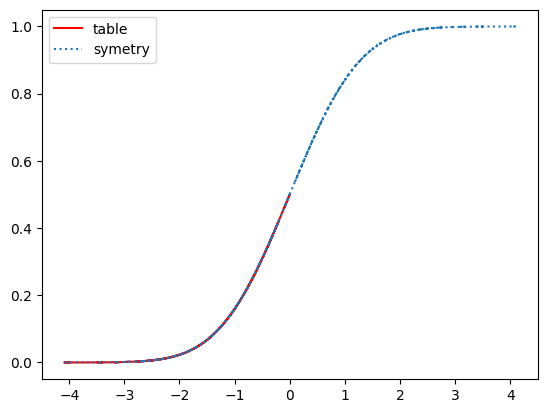

In [140]:
x=[]
for i in dftab.index:
    for c in dftab.columns:
        x.append(c+i)
vals = dftab.values.flatten()
plt.plot(x,vals, c="r",label="table")

# symetry of the curve
x= x+[-v for v in x[::-1]]
vals=list(vals)+[-v+1 for v in vals][::-1]
plt.plot(x,vals,  linestyle=':', c="C0",label="symetry")
plt.legend()
# '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'

## Not the same mu and std

(array([4., 5., 4., 6., 5., 3., 6., 1., 0., 1.]),
 array([ 3.02857143, 10.62776733, 18.22696323, 25.82615914, 33.42535504,
        41.02455094, 48.62374685, 56.22294275, 63.82213865, 71.42133456,
        79.02053046]),
 <BarContainer object of 10 artists>)

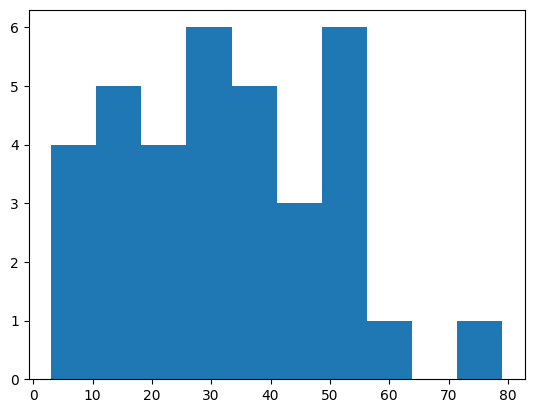

In [234]:

X0 = np.random.beta(a=2.0, b=5.0, size=100)
X1 = np.random.binomial(n=10, p=0.5, size=100)
X2 = np.random.chisquare(df=2, size=100)
X3 = np.random.dirichlet(alpha=[1, 2, 3], size=100)
X4 = np.random.exponential(scale=1.0, size=100)
X5 = np.random.f(dfnum=2, dfden=5, size=100)
X6 = np.random.gamma(shape=2.0, scale=1.0, size=100)
X7 = np.random.geometric(p=0.5, size=100)
X8 = np.random.gumbel(loc=0, scale=1, size=100)
X9 = np.random.hypergeometric(ngood=50, nbad=50, nsample=10, size=100)
X10 = np.random.laplace(loc=0, scale=1, size=100)
X11 = np.random.logistic(loc=0, scale=1, size=100)
X12 = np.random.lognormal(mean=0, sigma=1, size=100)
X13 = np.random.logseries(p=0.5, size=100)
X14 = np.random.multinomial(n=10, pvals=[0.1, 0.3, 0.6], size=100)
X15 = np.random.multivariate_normal(mean=[0, 0], cov=[[1, 0], [0, 1]], size=100)
X16 = np.random.negative_binomial(n=10, p=0.5, size=100)
X17 = np.random.noncentral_chisquare(df=2, nonc=1.0, size=100)
X18 = np.random.noncentral_f(dfnum=2, dfden=5, nonc=1.0, size=100)
X19 = np.random.normal(loc=0, scale=1, size=100)
X20 = np.random.pareto(a=2.0, size=100)
X21 = np.random.poisson(lam=3.0, size=100)
X22 = np.random.power(a=5.0, size=100)
X23 = np.random.rayleigh(scale=1.0, size=100)
X24 = np.random.standard_cauchy(size=100)
X25 = np.random.standard_exponential(size=100)
X26 = np.random.standard_gamma(shape=2.0, size=100)
X27 = np.random.standard_normal(size=100)
X28 = np.random.standard_t(df=10, size=100)
X29 = np.random.triangular(left=0, mode=0.5, right=1, size=100)
X30 = np.random.uniform(low=0.0, high=1.0, size=100)
X31 = np.random.vonmises(mu=0, kappa=1.0, size=100)
X32 = np.random.wald(mean=1.0, scale=1.0, size=100)
X33 = np.random.weibull(a=1.5, size=100)
X34 = np.random.zipf(a=2.0, size=100)

Xlist=[X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,
       X11,X12,X13,X14,X15,X16,X17,X18,X19,
       X20,X21,X22,X23,X24,X25,X26,X27,X28,
       X29,X30,X31,X32,X33,X34]

XL=[]
for x in Xlist:
    if len(x.shape) > 1:
        XL.append(x.T[0])
    else: 
        XL.append(x)
XL= np.array(XL)
# normalization 0,1
XL=XL-XL.min(axis=1).reshape((-1,1))
XL=XL/XL.max(axis=1).reshape((-1,1))

plt.hist(XL.sum(axis=1), bins=10)

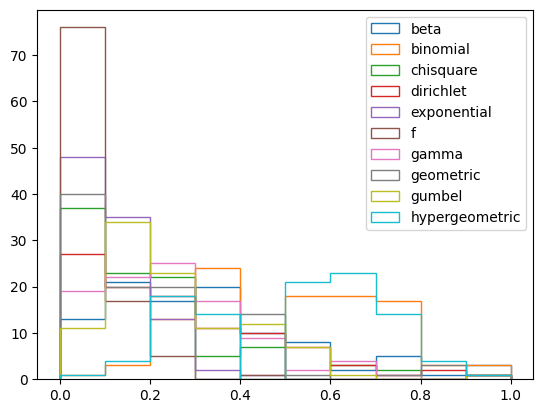

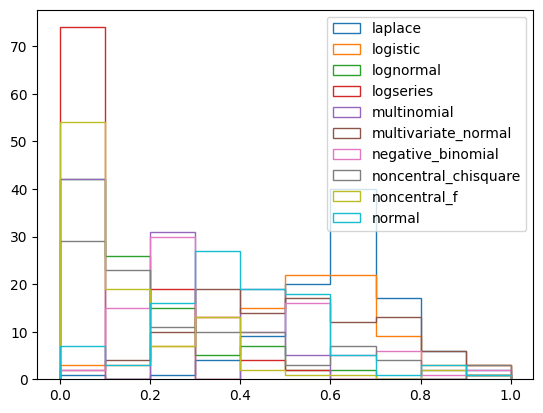

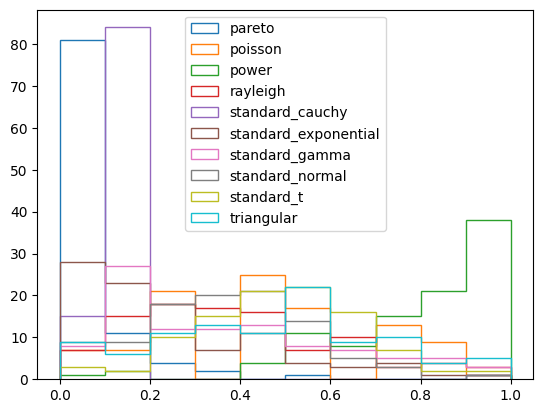

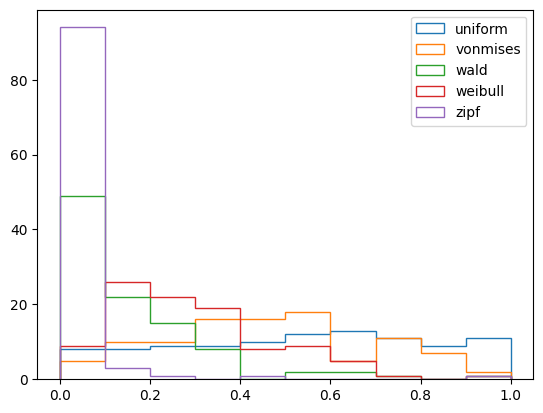

In [249]:
names=['beta', 'binomial', 'chisquare', 'dirichlet', 'exponential', 'f', 'gamma', 
       'geometric', 'gumbel', 'hypergeometric', 'laplace', 'logistic', 
       'lognormal', 'logseries', 'multinomial', 'multivariate_normal', 
       'negative_binomial', 'noncentral_chisquare', 'noncentral_f', 'normal',
       'pareto', 'poisson', 'power', 'rayleigh', 'standard_cauchy',
       'standard_exponential', 'standard_gamma', 'standard_normal', 
       'standard_t', 'triangular', 'uniform', 'vonmises', 'wald', 'weibull', 'zipf']
for i in range(4):
    for n , x in zip(names[i*10:(i+1)*10], XL[i*10:(i+1)*10]) :
        plt.hist(x, bins= 10, histtype=u'step', label=n)
    plt.legend()
    plt.show()

In [250]:
# TO BE CONTINUE